In [25]:
import pandas as pd
import numpy as np
import itertools
import math
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

from g4l.data import Sample
import g4l.display
from g4l.tree import ContextTree
import g4l.tree.generation

#cache_dir = '../example1/cache'

In [26]:
max_depth = 4

In [27]:
# Create a sample object instance
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])
t = ContextTree(X, max_depth=max_depth, tree_initialization_method=g4l.tree.generation.incremental_strategy)

In [28]:
df = t.df.copy()
# initialize
df['final'] = 1
df['children_contrib'] = df.transition_sum_log_probs
df.loc[df.lps==0, 'children_contrib'] = -math.inf

In [29]:
# mark all nodes in the last level as leaves
df['type'] = 'N' # simple node

max_node_length = df.l.max() # 4
df.loc[df.l==max_node_length, 'type'] = 'L' # (mark as leaf)

In [30]:
df_results = pd.DataFrame(columns=['iter_num', 'num_nodes', 'log_likelihood_sum', 'node_idx'])
df_results.node_idx = df_results.node_idx.astype(object)

In [31]:
df

,node_idx,node,len_idx,node_freq,l,parent_idx,node_prob,lps,transition_sum_log_probs,final,children_contrib,type
0,0,2,0,21830,1,None,0.223323,-14715.435172,-1.424897,1,-1.424897,N
1,1,1,1,21830,1,None,0.223323,-18794.382713,-8.296834,1,-8.296834,N
2,2,0,2,44111,1,None,0.451259,-62840.152905,-9.367255,1,-9.367255,N
3,3,3,3,7909,1,None,0.080910,-6671.568838,-9.670055,1,-9.670055,N
4,4,4,4,2070,1,None,0.021176,-1333.215732,-9.133726,1,-9.133726,N
...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,3334,148,1,4,68,0.010309,0.000000,0.000000,1,-inf,L
229,229,3342,149,2,4,79,0.666667,-1.386294,-1.386294,1,-1.386294,L
230,230,0334,150,2,4,59,0.004525,-1.386294,-1.386294,1,-1.386294,L
231,231,4214,151,1,4,61,0.001656,0.000000,0.000000,1,-inf,L


In [32]:
parent_node_idx = df.loc[(df.final==1) & (df.type=='L')].parent_idx.unique()
df.loc[df.node_idx.isin(parent_node_idx), 'type'] = 'LP'
lp_nodes = df.loc[(df.type=='LP') & (df.final==1)]

In [33]:
lp_nodes

,node_idx,node,len_idx,node_freq,l,parent_idx,node_prob,lps,transition_sum_log_probs,final,children_contrib,type
25,25,210,0,6379,3,6,0.725628,-6428.513697,-7.195982,1,-7.195982,LP
26,26,102,1,9823,3,7,0.648983,-6517.324830,-1.446844,1,-1.446844,LP
27,27,021,2,5602,3,8,0.393509,-4457.840286,-8.874746,1,-8.874746,LP
28,28,212,3,1628,3,6,0.185189,-1119.551487,-1.397258,1,-1.397258,LP
29,29,121,4,1827,3,9,0.398560,-1417.964504,-8.849487,1,-8.849487,LP
30,30,213,5,661,3,6,0.075191,-536.081330,-8.888346,1,-8.888346,LP
31,31,130,6,1123,3,10,0.701875,-984.915596,-8.200530,1,-8.200530,LP
32,32,302,7,3487,3,11,0.643714,-2389.800479,-1.401979,1,-1.401979,LP
33,33,020,8,8634,3,8,0.606491,-5951.316544,-1.394032,1,-1.394032,LP
34,34,201,9,7198,3,12,0.552036,-5981.962279,-8.337503,1,-8.337503,LP


In [34]:
# iteration block

iteration_num = 0
while df.final.sum()>0:
    # fetch all nodes connected to leaf nodes and mark them as parent of leaves (LP)
    parent_node_idx = df.loc[(df.final==1) & (df.type=='L')].parent_idx.unique()
    df.loc[df.node_idx.isin(parent_node_idx), 'type'] = 'LP' # leaf parent

    # for all LP nodes, mark as candidate those ones that connects only with leaf nodes
    lp_nodes = df.loc[(df.type=='LP') & (df.final==1)]
    for idx, lp_node in lp_nodes.iterrows():
        child_nodes = df[df.parent_idx==lp_node.node_idx]

        num_child_nodes = len(child_nodes)
        active_child_nodes = (child_nodes.final==1).astype(int).sum()
        leaf_nodes = (child_nodes.type=='L').astype(int).sum()
        # when all child nodes are leaves and active
        if num_child_nodes == active_child_nodes == leaf_nodes:
            df.loc[df.node_idx==lp_node.node_idx, 'type'] = 'LPC' # mark these nodes as candidates (LPC)

    lpc = df[df.type=='LPC']
    if len(lpc)==0:
        break
    
    # for all the candidate nodes (LPC), calculate the less contributive
    less_contributive_lp_idx = np.array(lpc.sort_values(['children_contrib']).node_idx)[0]    
    
    # Eliminate leaves
    df.loc[df.parent_idx==less_contributive_lp_idx, 'final'] = 0

    # The less contributive LPC becomes a leaf
    df.loc[df.node_idx==less_contributive_lp_idx, 'type'] = 'L'
    iteration_num += 1

    active_nodes = df[df.final==1]
    # ['iter_num', 'num_nodes', 'log_likelihood_sum', 'node_idx']
    df_results.loc[len(df_results)] = [iteration_num, len(active_nodes), active_nodes[active_nodes.type=='L'].lps.sum(), np.array(active_nodes.node_idx)]

In [35]:
x = df_results.sort_values(['log_likelihood_sum'], ascending=False).node_idx[:1]
nodes_idx = x.to_numpy()[0]
new_df = t.df.copy()
new_df = new_df[new_df.node_idx.isin(nodes_idx)]
new_df.final = 1
new_t = ContextTree(X, max_depth=max_depth, source_data_frame=new_df)

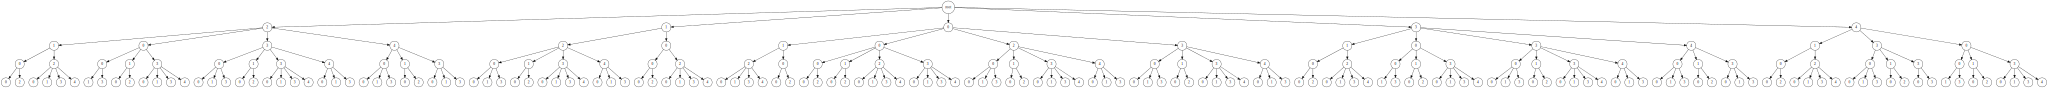

In [36]:
g4l.display.draw_tree(t.to_str(), size='400')
# the last iteration has length=1 

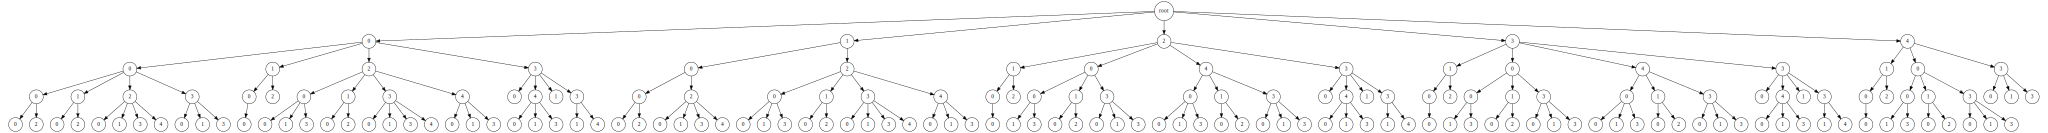

In [37]:
g4l.display.draw_tree(new_t.to_str(), size='40')
# the last iteration has length=1 

In [38]:
new_t.df

,node_idx,node,len_idx,node_freq,l,parent_idx,node_prob,lps,transition_sum_log_probs
0,0,2,0,21830,1,None,0.223323,-14715.435172,-1.424897
1,1,1,1,21830,1,None,0.223323,-18794.382713,-8.296834
2,2,0,2,44111,1,None,0.451259,-62840.152905,-9.367255
3,3,3,3,7909,1,None,0.080910,-6671.568838,-9.670055
4,4,4,4,2070,1,None,0.021176,-1333.215732,-9.133726
...,...,...,...,...,...,...,...,...,...
220,220,3432,140,1,4,75,0.090909,0.000000,0.000000
221,221,1343,141,3,4,72,0.250000,-1.909543,-1.504077
223,223,304,143,1,4,71,0.005714,0.000000,0.000000
229,229,3342,149,2,4,79,0.666667,-1.386294,-1.386294


In [39]:
results = df_results.sort_values(['num_nodes'], ascending=True)

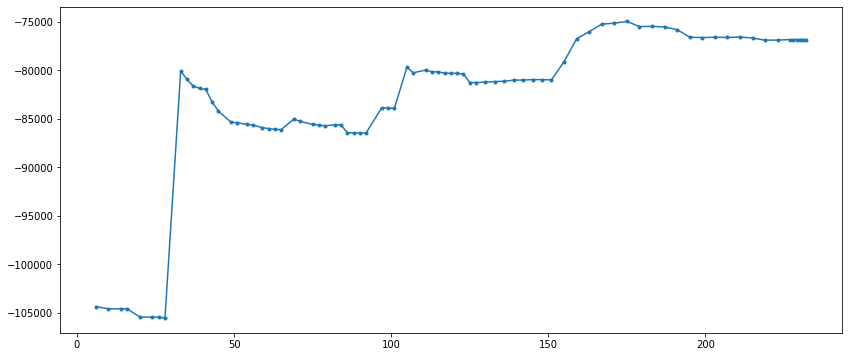

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(results.num_nodes, results.log_likelihood_sum, marker='.')
#plt.plot(results.num_nodes, results.log_likelihood_sum)
plt.show()

In [49]:
results.head(20)

,iter_num,num_nodes,log_likelihood_sum,node_idx
79,80,6,-104354.755361,"[0, 1, 2, 3, 4, 5]"
78,79,10,-104589.139664,"[0, 1, 2, 3, 4, 5, 11, 18, 21, 22]"
77,78,14,-104586.683785,"[0, 1, 2, 3, 4, 5, 11, 18, 21, 22, 60, 68, 69,..."
76,77,16,-104593.917317,"[0, 1, 2, 3, 4, 5, 11, 18, 21, 22, 60, 68, 69,..."
75,76,20,-105439.965144,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 15, 18, 21, 2..."
74,75,24,-105447.661177,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 15, 18, 21, 2..."
73,74,26,-105451.217671,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 15, 18, 21, 2..."
72,73,28,-105532.509839,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 15, 18, 21, 2..."
71,72,33,-80083.249261,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15..."
70,71,35,-80950.128709,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15..."


In [42]:
t.log_likelihood()


-339879.4225307956

In [43]:
df.lps

0     -14715.435172
1     -18794.382713
2     -62840.152905
3      -6671.568838
4      -1333.215732
           ...     
228        0.000000
229       -1.386294
230       -1.386294
231        0.000000
232        0.000000
Name: lps, Length: 233, dtype: float64

In [44]:
t.log_likelihood()

-339879.4225307956